Data load, set your target and unsused_features

train data and valida data would be 75% and 25% of train data.

In [3]:
from torch import nn
import torch
from torch import tensor 
from torch.autograd import Variable
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from pytorch_tabnet.tab_model import TabNetClassifier, TabNetRegressor
from sklearn.metrics import roc_auc_score

train= pd.read_csv('output.csv')
#df = pd.read_csv('./data/my.nih.norm.csv')
#df1 = pd.read_csv('./data/abcd_tbss01.csv')


In [21]:
data_all=train[train['HSE gap'].isnull() ==False]

In [24]:

dataset=data_all.fillna(0).reset_index(drop=True)

In [26]:
dataset

,Material,ICSD number,GGA gap,HSE gap,Atomic mass,Atomic no,Atomic orbitals_1s,Atomic orbitals_2s,Atomic orbitals_2p,Atomic orbitals_3s,...,Ionic radii hs_2,Ionic radii hs_3,Ionic radii hs_4,Ionic radii ls_2,Ionic radii ls_3,Ionic radii ls_4,Ionic radii ls_5,Ionic radii ls_6,Ionic radii ls_7,Set
0,S,38263,1.975665,3.067626,32.065000,16.0,-87.789937,-7.699940,-5.751257,-0.630912,...,0.000,0.00,0.00,0.00,0.000,0.0,0.0,0.0,0.0,train
1,Se,86375,1.479159,2.299414,78.960000,34.0,-451.300258,-57.311948,-51.514388,-7.547186,...,0.000,0.00,0.00,0.00,0.000,0.0,0.0,0.0,0.0,test
2,C,193439,0,0.000000,12.010700,6.0,-9.947718,-0.500866,-0.199186,0.000000,...,0.000,0.00,0.00,0.00,0.000,0.0,0.0,0.0,0.0,train
3,C,157074,0.101161,0.112731,12.010700,6.0,-9.947718,-0.500866,-0.199186,0.000000,...,0.000,0.00,0.00,0.00,0.000,0.0,0.0,0.0,0.0,train
4,C,20351,3.011296,4.134729,12.010700,6.0,-9.947718,-0.500866,-0.199186,0.000000,...,0.000,0.00,0.00,0.00,0.000,0.0,0.0,0.0,0.0,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,Co1F1H4Na1O6S1,169111,3.202057,4.974672,58.933195,27.0,-275.616639,-32.379758,-28.152095,-3.651812,...,0.885,0.75,0.67,0.79,0.685,0.0,0.0,0.0,0.0,train
11996,C2H6K1N4O4P1,424131,5.238256,6.872532,12.010700,6.0,-9.947718,-0.500866,-0.199186,0.000000,...,0.000,0.00,0.00,0.00,0.000,0.0,0.0,0.0,0.0,train
11997,B2Be2Ca1F1K1O6,183886,5.256318,7.025251,10.811000,5.0,-6.564347,-0.344701,-0.136603,0.000000,...,0.000,0.00,0.00,0.00,0.000,0.0,0.0,0.0,0.0,train
11998,C8Cr1H12N2O2S2,250698,1.989884,3.025600,12.010700,6.0,-9.947718,-0.500866,-0.199186,0.000000,...,0.000,0.00,0.00,0.00,0.000,0.0,0.0,0.0,0.0,train


In [28]:
HSE_class=[]
for i in dataset['HSE gap'] :
    if i == 0:
        HSE_class.append(0)
    elif i!= 0:
        HSE_class.append(1)

In [30]:
dataset['HSE_class']= HSE_class

In [31]:



if "Set" not in dataset.columns:
    dataset["Set"] = np.random.choice(["train", "valid", "test"], p =[.8, .1, .1], size=(dataset.shape[0],))

train_indices = dataset[dataset.Set=="train"].index
valid_indices = dataset[dataset.Set=="valid"].index
test_indices = dataset[dataset.Set=="test"].index

In [32]:
target = 'HSE_class'
unused_feat = ['Material', 'Set', 'GGA gap', 'HSE gap']
features = [ col for col in train.columns if col not in unused_feat + [target]] 

In [33]:
X_train = dataset[features].values[train_indices]
y_train = dataset[target].values[train_indices]
X_valid = dataset[features].values[valid_indices]
y_valid = dataset[target].values[valid_indices]
X_test = dataset[features].values[test_indices]
y_test = dataset[target].values[test_indices]

print("X_train.shape: ", X_train.shape)
print("y_train.shape: ",y_train.shape)
print("X_valid.shape: ", X_valid.shape)
print("y_valid.shape: ",y_valid.shape)
print("X_test.shape: ", X_test.shape)
print("y_test.shape: ",y_test.shape)

X_train.shape:  (9574, 114)
y_train.shape:  (9574,)
X_valid.shape:  (1165, 114)
y_valid.shape:  (1165,)
X_test.shape:  (1261, 114)
y_test.shape:  (1261,)


In [ ]:
# Augmented
import torch
import itertools
from pytorch_tabnet.tab_model import TabNetClassifier
from sklearn.metrics import roc_auc_score, accuracy_score
from tqdm.notebook import tqdm
# Store maximum auc
max_auc = 0
# Store maximum hypterparameter set
max_hy = []
# define hyperparameter space
n_ = [4,8,16]
lr_ = [2e-2, 1e-2, 2e-3]
w_ = [0.01, 0.001]
g_ = [0.95, 0.99, 0.9]
ss_ = [10, 20, 30]
all_ = [n_, lr_, w_, g_, ss_]
h_space = [s for s in itertools.product(*all_)]
# Start training


for hy in tqdm(h_space):
    clf = TabNetClassifier(n_a = hy[0],
                           n_d = hy[0],
                           optimizer_params = dict(lr=hy[1], weight_decay=hy[2]),
                           scheduler_params={"step_size":hy[4], "gamma":hy[3]},
                           scheduler_fn=torch.optim.lr_scheduler.StepLR,
                           verbose=0
                           )
    clf.fit(X_train, y_train, X_valid, y_valid, patience=50, batch_size=256, max_epochs=200)
    preds_acc = clf.predict(X_test)
    preds_prob = clf.predict_proba(X_test)
    test_auc = roc_auc_score(y_score=preds_prob[:,1], y_true=y_test)
    test_acc = accuracy_score(preds_acc, y_test)
    print("FINAL TEST SCORE", test_auc, test_acc)
    if test_auc>max_auc:
        max_hy = hy
        max_auc = test_auc


Device used : cuda
FINAL TEST SCORE 0.7496281050026289 0.8897700237906423
Device used : cuda
FINAL TEST SCORE 0.7485540978981521 0.8897700237906423
Device used : cuda
FINAL TEST SCORE 0.7377306710781106 0.8897700237906423
Device used : cuda
FINAL TEST SCORE 0.7560240577591403 0.8897700237906423
Device used : cuda
FINAL TEST SCORE 0.7396799138229524 0.8897700237906423
Device used : cuda
FINAL TEST SCORE 0.7377306710781106 0.8897700237906423
Device used : cuda
FINAL TEST SCORE 0.7559727618974339 0.8897700237906423
Device used : cuda
FINAL TEST SCORE 0.7516927634363098 0.8897700237906423
Device used : cuda
FINAL TEST SCORE 0.7377306710781106 0.8897700237906423
Device used : cuda
FINAL TEST SCORE 0.7536035342848717 0.8897700237906423
Device used : cuda
FINAL TEST SCORE 0.7463579938188486 0.8897700237906423
Device used : cuda
FINAL TEST SCORE 0.7500737378012029 0.8897700237906423
Device used : cuda
FINAL TEST SCORE 0.7548666948793906 0.8897700237906423
Device used : cuda
FINAL TEST SCORE 0.

In [35]:
hy = max_hy
clf = TabNetClassifier(n_a = hy[0],
                           n_d = hy[0],
                           optimizer_params = dict(lr=hy[1], weight_decay=hy[2]),
                           scheduler_params={"step_size":hy[4], "gamma":hy[3]},
                           scheduler_fn=torch.optim.lr_scheduler.StepLR,
                           verbose=0
                           )
clf.fit(X_train, y_train, X_valid, y_valid, patience=50, batch_size=256, max_epochs=200)
preds_acc = clf.predict(X_test)
preds_prob = clf.predict_proba(X_test)
test_auc = roc_auc_score(y_score=preds_prob[:,1], y_true=y_test)
test_acc = accuracy_score(preds_acc, y_test)
print("max_hy = " ,hy)
print("FINAL TEST SCORE", test_auc, test_acc)
    

Device used : cuda
max_hy =  (4, 0.02, 0.01, 0.99, 10)
FINAL TEST SCORE 0.7560240577591403 0.8897700237906423


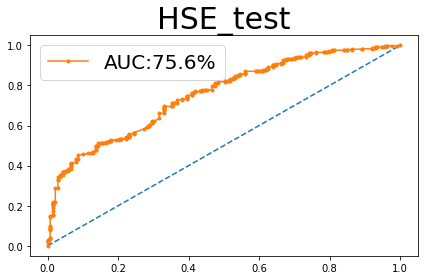

In [40]:
def rocvis(true , prob , label ) :
    from sklearn.metrics import roc_curve
    if type(true[0]) == str :
        from sklearn.preprocessing import LabelEncoder
        le = LabelEncoder()
        true = le.fit_transform(true)
    else :
        pass
    fpr, tpr, thresholds = roc_curve(true, prob)
    plt.plot(fpr, tpr, marker='.', label = label  )

target_name = 'HSE'
plt.plot([0, 1], [0, 1], linestyle='--')
rocvis(y_test , preds_prob[:,1] , f"AUC:{round(test_auc*100, 2)}%")

plt.legend(fontsize = 20)
plt.title(f'{target_name}_test', fontsize= 30)
plt.tight_layout()
plt.savefig(f'{target_name}_ROC.png')
plt.show()        


,feature name,ratio
0,Ionic radii_7,0.120719
1,Rigidity modulus,0.109122
2,Common oxidation states_1,0.093180
3,Mineral hardness,0.080751
4,Ionic radii hs_2,0.040565
5,Ionic radii_1,0.039697
6,Ionic radii_3,0.039521
7,Superconduction temperature,0.039030
8,Coefficient of linear thermal epansion,0.037686
9,Ionic radii_5,0.034473


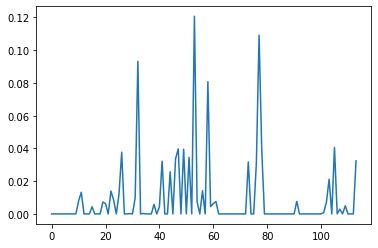

In [38]:
importance =clf.feature_importances_
plt.plot(importance)

labels_importance=importance.argsort()[::-1]

importance_sort = np.sort(importance)[::-1]

feat_name_sort=train[features].columns[labels_importance]
important_features = pd.DataFrame() 


for i in range (20):
    feature = pd.DataFrame([[feat_name_sort[i],importance_sort[i]]], columns = ['feature name', 'ratio'])
    important_features=pd.concat([important_features,feature])

important_features.reset_index(drop=True)

In [39]:
important_features.reset_index(drop=True).to_csv("data_all_HSE.csv")

In [59]:
from sklearn.model_selection import KFold
NUM_FOLDS = 5  # you can specify your folds here

# Creating FOLDS

test_data_processed["kfold"] = -1

train_data_processed["kfold"] = -1

train_data_processed = train_data_processed.sample(frac=1,random_state=2020).reset_index(drop=True)

kf = KFold(n_splits=NUM_FOLDS)

for fold, (trn_, val_) in enumerate(kf.split(X=train_data_processed, y=train_data_processed)):
    train_data_processed.loc[val_, 'kfold'] = fold
    
train_data_processed

,Unnamed: 0,subjectkey,sex,race.ethnicity,abcd_site,lh_bankssts_area._.1,lh_caudalanteriorcingulate_area._.1,lh_caudalmiddlefrontal_area._.1,lh_cuneus_area._.1,lh_entorhinal_area._.1,...,wm.rh.transversetemporal._.18,wm.rh.insula._.18,Left.UnsegmentedWhiteMatter._.18,Right.UnsegmentedWhiteMatter._.18,lhCerebralWhiteMatterVol._.18,rhCerebralWhiteMatterVol._.18,CerebralWhiteMatterVol._.18,MaskVol._.18,EstimatedTotalIntraCranialVol._.18,kfold
0,5258,NDAR_INVH1DJ48J1,1,1,11,0.995173,1.096158,3.477764,1.166651,-0.589630,...,-0.828231,1.227477,1.750053,1.565132,1.631344,1.573952,1.604291,1.629750,1.444491,0
1,1667,NDAR_INV57CKHLC8,1,3,3,0.038717,-0.522494,-0.909285,-1.074445,-0.685008,...,1.342644,-0.179764,-0.925164,-0.686693,-1.027205,-0.920787,-0.974965,-0.740189,-0.236888,0
2,4333,NDAR_INVDZLD38UM,2,3,10,-0.046412,-0.502593,-0.002720,0.520982,-1.867698,...,-0.698690,1.028569,-0.212771,-0.051552,-0.207165,-0.240379,-0.224018,-0.060954,-0.505478,0
3,4979,NDAR_INVG270KBWC,1,1,13,-0.552182,-0.927157,-0.900174,-1.078611,-0.704084,...,5.567552,0.719304,-0.229947,-0.250116,-0.075780,-0.025129,-0.050486,-0.846273,-0.822425,0
4,3629,NDAR_INVBLYFK2HJ,1,2,1,0.925066,-1.066467,-0.362613,-1.395197,-1.696018,...,1.167382,-0.962313,-1.103856,-1.130861,-1.167459,-1.086792,-1.128264,-1.030148,-1.191267,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7819,6538,NDAR_INVM2JLZJJ1,2,4,1,-1.077982,-1.099636,-1.599460,-0.062203,-1.629253,...,1.397678,-0.202992,-0.791601,-1.215579,-0.851700,-1.124041,-0.989011,-0.940313,-0.772565,4
7820,7159,NDAR_INVP7PFH5GK,1,3,1,1.135386,-1.683412,-1.241845,-1.366037,-0.704084,...,0.103958,-0.595878,-0.036227,-0.455683,-0.877917,-0.870463,-0.875096,-0.697011,-1.274056,4
7821,8027,NDAR_INVTYTK28UK,1,1,21,0.274075,0.810904,-0.036887,1.741504,1.174867,...,1.499279,1.518349,0.251369,0.198816,0.961198,0.994185,0.978722,1.254736,1.320461,4
7822,5325,NDAR_INVH7TVMCPN,2,1,11,-0.992853,-0.230606,-0.979897,1.270791,0.907808,...,-0.481941,0.271619,-2.229720,-2.280253,-1.149105,-1.184561,-1.168061,-0.669032,-0.308014,4


In [60]:

target='sex'
unused_feat = ['Set', 'subjectkey', 'race.ethnicity', 'abcd_site', 'Unnamed: 0']

features = [ col for col in train_data_processed.columns if col not in unused_feat + [target]] 


In [1]:
X_test = test_data_processed[features].values
Y_test = test_data_processed[target].values

def run(fold):
    df_train = train_data_processed[train_data_processed.kfold != fold]
    df_valid = train_data_processed[train_data_processed.kfold == fold]
    
    X_train = df_train[features].values
    Y_train = df_train[target].values
    
    X_valid = df_valid[features].values
    Y_valid = df_valid[target].values
    
    y_oof = np.zeros((df_valid.shape[0],len(target)))   # Out of folds validation
    
    print("--------Training Begining for fold {}-------------".format(fold+1))
    n_ = [4,8,16]
    lr_ = [2e-2, 1e-2, 5e-3, 2e-3, 1e-3, 1e-4]
    w_ = [0.01, 0.001, 0.0001]
    g_ = [0.95, 0.99, 0.9]
    ss_ = [10, 20, 30]
    all_ = [n_, lr_, w_, g_, ss_]
    h_space = [s for s in itertools.product(*all_)]
# Start training
    hy=  (4, 0.02, 0.001, 0.9, 20)
    
    clf = TabNetClassifier(n_a = hy[0],
                       n_d = hy[0],
                       optimizer_params = dict(lr=hy[1], weight_decay=hy[2]),
                       scheduler_params={"step_size":hy[4], "gamma":hy[3]},
                       scheduler_fn=torch.optim.lr_scheduler.StepLR,
                       verbose=0
                           )
    clf.fit(X_train, Y_train, X_valid, Y_valid, patience=50, batch_size=256, max_epochs=200)
    preds_acc = clf.predict(X_test)
    preds_prob = clf.predict_proba(X_test)
    test_auc = roc_auc_score(y_score=preds_prob[:,1], y_true=Y_test)
    test_acc = accuracy_score(preds_acc, Y_test)
    print("FINAL TEST SCORE", test_auc, test_acc)

    # VISUALIZTION
    #plt.figure(figsize=(12,6))
    #plt.plot(model.history['train']['loss'])
    #plt.plot(model.history['valid']['loss'])
    
    #Plotting Metric
    #plt.plot([-x for x in model.history['train']['metric']])
    #plt.plot([-x for x in model.history['valid']['metric']])

NameError: name 'test_data_processed' is not defined

In [68]:
run(fold=0)

--------Training Begining for fold 1-------------
Device used : cuda
FINAL TEST SCORE 0.9319991637484973 0.8349514563106796


--------Training Begining for fold 1-------------
Device used : cuda
FINAL TEST SCORE 0.9319991637484973 0.8349514563106796
                       feature name     ratio
0      lhCerebralWhiteMatterVol._.9  0.201582
1            BrainSegVolNotVent._.4  0.200428
2    rh_G_temporal_middle_area._.14  0.086167
3  rh_S_oc_middle.Lunatus_area._.14  0.085094
4          rh_S_front_sup_area._.14  0.064803
--------Training Begining for fold 2-------------
Device used : cuda
FINAL TEST SCORE 0.9338640045993832 0.7812979049565661
                       feature name     ratio
0      lhCerebralWhiteMatterVol._.9  0.201582
1            BrainSegVolNotVent._.4  0.200428
2    rh_G_temporal_middle_area._.14  0.086167
3  rh_S_oc_middle.Lunatus_area._.14  0.085094
4          rh_S_front_sup_area._.14  0.064803
--------Training Begining for fold 3-------------
Device used : cuda
FINAL TEST SCORE 0.930464642241154 0.8277976494634645
                       feature name     ratio
0      lhCerebralWhiteMatterVol

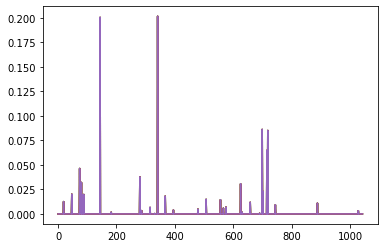

In [71]:
for i in range(NUM_FOLDS):
    run(fold = i)
    feature(5)

Do it with best hyperparameter 

find feature importance 

In [70]:
# 위에서 부터 랭킹 찾고 싶은 숫자

def feature(num):
    importance =clf.feature_importances_
    plt.plot(importance)

    labels_importance=importance.argsort()[::-1]

    importance_sort = np.sort(importance)[::-1]

    feat_name_sort=test_data_processed[features].columns[labels_importance]
    important_features = pd.DataFrame() 


    for i in range (num):
        feature = pd.DataFrame([[feat_name_sort[i],importance_sort[i]]], columns = ['feature name', 'ratio'])
        important_features=pd.concat([important_features,feature])

    print(important_features.reset_index(drop=True))
